In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

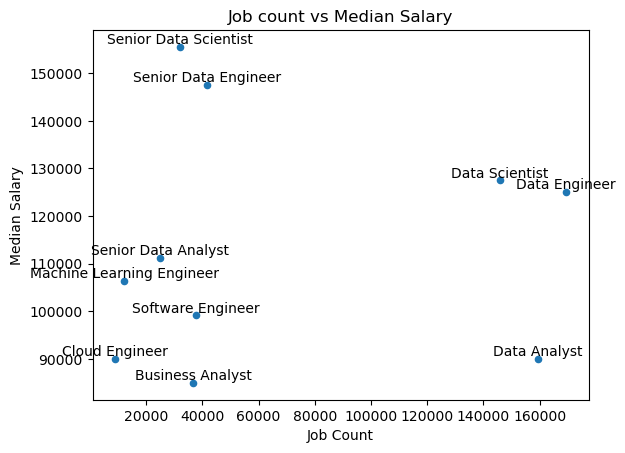

In [11]:
#Median Yearly Salary vs. job count
#Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.

df_new = df.groupby('job_title_short').agg( 
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_skills', 'count')
)

df_new.plot(kind= 'scatter', x = 'job_count', y= 'median_salary')
plt.xlabel('Job Count')
plt.ylabel('Median Salary')
plt.title('Job count vs Median Salary')
# for i, txt in enumerate(df_new.index):
#     plt.text(df_new['job_count'].iloc[i], df_new['median_salary'].iloc[i], txt )

for i in range (len(df_new)):
    plt.text(df_new['job_count'].iloc[i], df_new['median_salary'].iloc[i], df_new.index[i], ha='center', va='bottom')
plt.show()

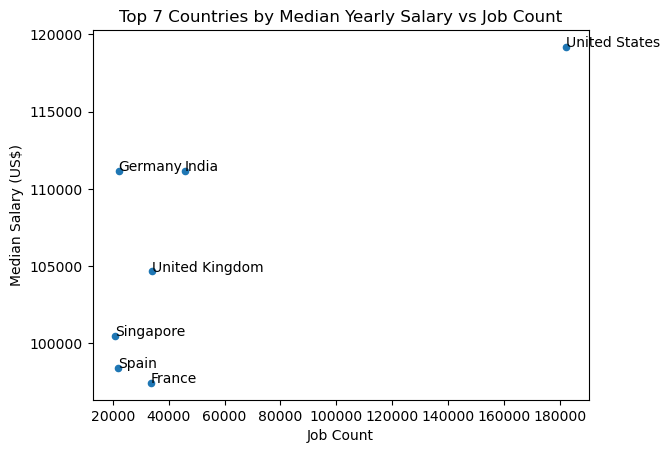

In [21]:
#Top 7 Countries by Median Yearly Salary vs Job Count
#Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.

df_top_7 = df.groupby('job_country').agg( 
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_skills', 'count')
)

df_top_7 = df_top_7.sort_values(by= 'job_count', ascending = False).head(7)
df_top_7.plot(kind = 'scatter', x = 'job_count', y= 'median_salary')
plt.xlabel('Job Count')
plt.ylabel('Median Salary (US$)')
plt.title('Top 7 Countries by Median Yearly Salary vs Job Count')

for i in range(len(df_top_7)):
    plt.text(df_top_7['job_count'].iloc[i], df_top_7['median_salary'].iloc[i], df_top_7.index[i])

plt.show()

In [ ]:
#Average Yearly Salary vs. Job Count for Top Roles by Schedule Type
#Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
# Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
# United States for the job_country
# 'Full-time' and 'Contractor' for the job_schedule_type
# Remove roles that do not have any yearly salary data.

target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
# df_target = df[df['job_title_short'].isin(target_job_titles)]
# df_target = df_target[df_target['job_country'] == 'United States']
# df_target = df_target[(df_target['job_schedule_type'] == 'Full-time') | (df_target['job_schedule_type'] =='Contractor')]
# df_target.dropna(subset='salary_year_avg')

us_jobs_df = df[
 (df['job_country'] == 'United States') &
 (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
 (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
 mean_salary_year_avg=('salary_year_avg', 'mean'),
 job_count=('job_title_short', 'count')
).dropna()

#Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
# df_target['job_title_type'] = df_target['job_title_short'] + df_target['job_schedule_type']

# df_plot = df_target.groupby('job_title_type').agg(
#     median_salary = ('salary_year_avg', 'median'),
#     job_count = ('job_title_type', 'count')
# )

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

#For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
# plt.scatter(df_plot['job_count'], df_plot['median_salary'])
# plt.xlabel('Job Count')
# plt.ylabel('Median Salary')
# plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')

# for i in range(len(df_plot)):
#     plt.text(df_plot['job_count'].iloc[i], df_plot['median_salary'].iloc[i], df_plot.index[i])
# plt.show()

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
 subset = stats[stats['job_title_type'] == job_title_type]
 plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

mean_salary_year_avg  job_count
job_schedule_type job_title_short                                 
Contractor        Data Analyst             87027.197142        111
                  Data Engineer           117772.326225         74
                  Data Scientist          118568.074155         61
Full-time         Data Analyst             95072.545202       4097
                  Data Engineer           133804.432239       2759
                  Data Scientist          140848.379828       4325